# Support Vector Machine


## Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

## Loading dataset and describing it

In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Creating Dataframe

In [4]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Checking for null values

In [7]:
df_iris.isnull().count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
dtype: int64

## Visualising how the 3 classes are distributed

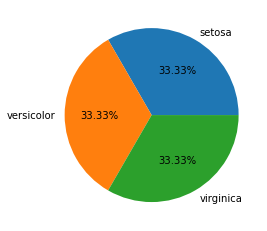

In [8]:
classes = df_iris.groupby('target')['target'].count()

plt.pie(classes, labels=iris.target_names, autopct='%.2f%%')
plt.show()

## Visualisation at a granular level

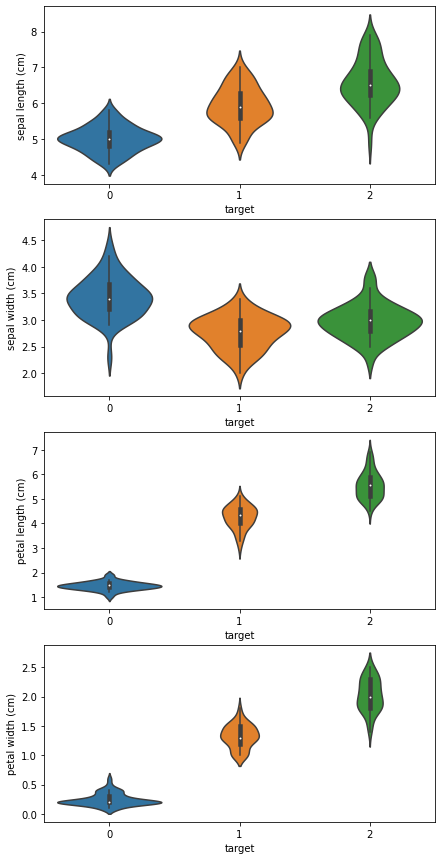

In [9]:
fig, axs = plt.subplots(nrows=4)
fig.set_size_inches(7, 15)
p1 = sns.violinplot(x='target', y='sepal length (cm)', data=df_iris, ax=axs[0])
p2 = sns.violinplot(x='target', y='sepal width (cm)', data=df_iris, ax=axs[1])
p3 = sns.violinplot(x='target', y='petal length (cm)', data=df_iris, ax=axs[2])
p4 = sns.violinplot(x='target', y='petal width (cm)', data=df_iris, ax=axs[3])
plt.show()

## Visualising how the classes are distributed for each pair of features

### for sepal width

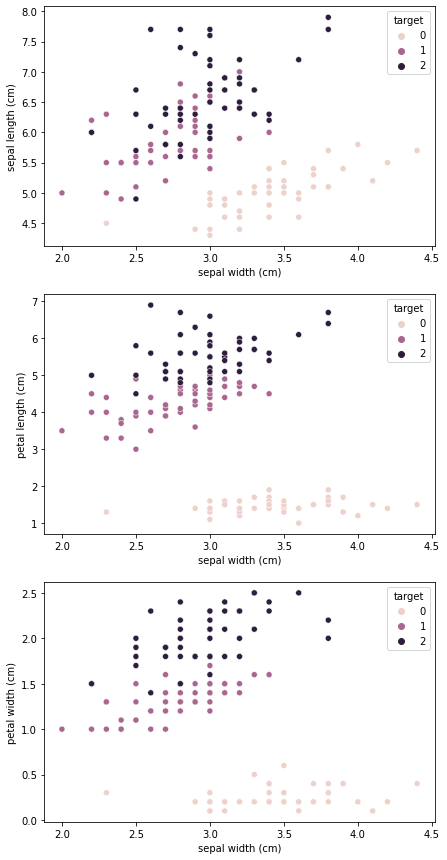

In [10]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(7, 15)

p0 = sns.scatterplot(x='sepal width (cm)', y='sepal length (cm)', hue='target', data=df_iris, ax=axs[0])
p1 = sns.scatterplot(x='sepal width (cm)', y='petal length (cm)', hue='target', data=df_iris, ax=axs[1])
p2 = sns.scatterplot(x='sepal width (cm)', y='petal width (cm)', hue='target', data=df_iris, ax=axs[2])

plt.show()

### for the rest

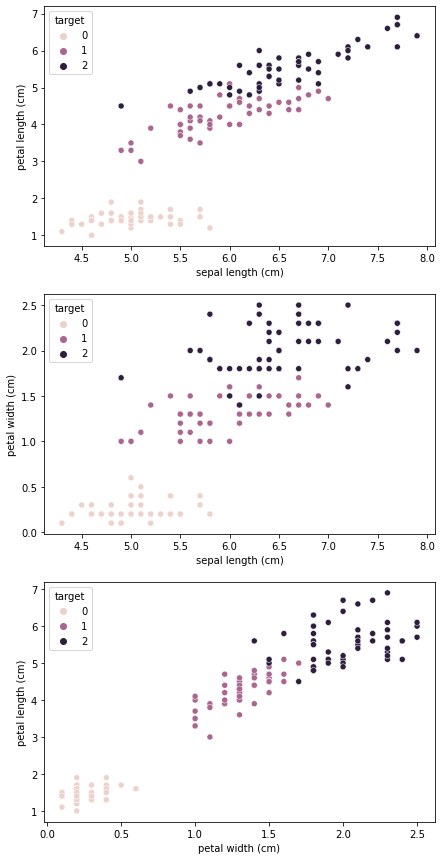

In [11]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(7, 15)

p0 = sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='target', data=df_iris, ax=axs[0])
p1 = sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='target', data=df_iris, ax=axs[1])
p2 = sns.scatterplot(x='petal width (cm)', y='petal length (cm)', hue='target', data=df_iris, ax=axs[2])

plt.show()

## Checking the contribution of each feature w.r.t the target

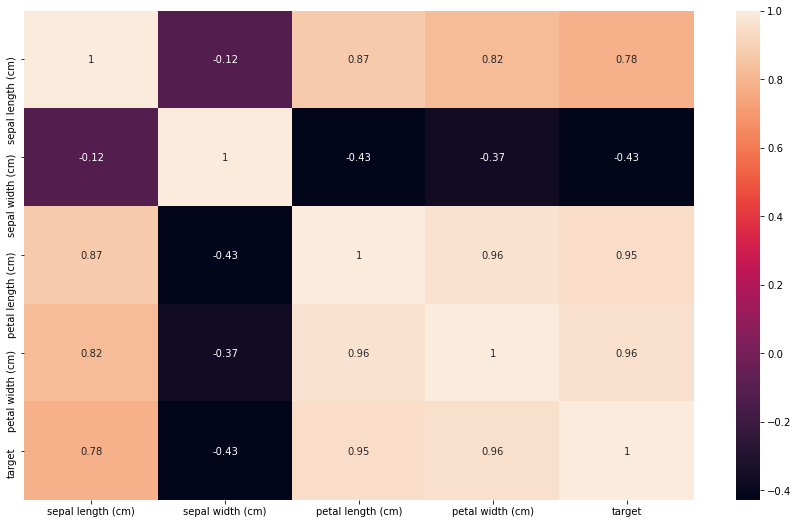

In [12]:
cor_mat = df_iris.corr()
# cor_mat = features[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']].corr()

fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(15, 9)
sns.heatmap(cor_mat, annot=True)
plt.show()

## Standardising the features

In [13]:
std = scale(df_iris.loc[:, df_iris.columns != 'target'])
df_std = pd.DataFrame(std, columns=iris.feature_names)

In [14]:
features = df_std.loc[:, df_std.columns != 'target'].copy()
target = df_iris['target'].copy()

## Train and Test split

In [15]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.1)

## Creating the SCV model

In [16]:
model = SVC(kernel='linear')
model.fit(train_x, train_y)

predicted_y = model.predict(test_x)

## Ploting Confusion Matrix for checking efficiency

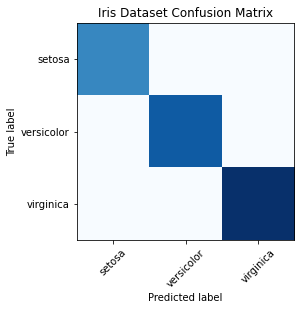

In [17]:
cmat = confusion_matrix(test_y, predicted_y)

tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)
plt.tight_layout
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Iris Dataset Confusion Matrix')
plt.imshow(cmat, interpolation='nearest', cmap=plt.cm.Blues)
plt.show()

## Metrics for Evaluating the model

In [18]:
accuracy = accuracy_score(test_y, predicted_y)
print('Model accuracy : ', accuracy)

metric_score = precision_recall_fscore_support(test_y, predicted_y, average='macro')

metric_name = ['precision', 'recall', 'fscore']

for i in range(0, 3):
    print('Model ' + metric_name[i] + ' : ' + str(metric_score[i]))

Model accuracy :  1.0
Model precision : 1.0
Model recall : 1.0
Model fscore : 1.0
